In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

import re

from pathlib import Path
import glob

import numpy as np
from scipy.stats import linregress

import seaborn as sns

import pandas as pd

In [2]:
auxps = [340, 460, 580, 700, 820, 940, 1060, 1180, 1300, 1420, 1540, 1660, 1780, 1900]
djis = ["0022", "0023", "0024", "0025", "0026", "0027", "0028", "0029", "0030"]

In [3]:
home_path = str(Path.home())

df = pd.DataFrame()

for auxp in auxps:
    for dji in djis:
        sim_file = home_path + f"/ParkSim/data/parking_energy_20220909/DJI_{dji}_simulated_AuxP_{auxp}.mat"
        dist_time_energy = loadmat(sim_file)["dist_time_energy"]
        data = pd.DataFrame({'AuxP': auxp, 'Source': 'Sim', 'File': dji, 'Distance': dist_time_energy[:, 0], 'Time': dist_time_energy[:, 1], 'Energy': dist_time_energy[:, 2]})
        df = pd.concat([df, data], ignore_index=True)

        real_file = home_path + f"/ParkSim/data/parking_energy_20220909/DJI_{dji}_real_AuxP_{auxp}.mat"
        dist_time_energy = loadmat(real_file)["dist_time_energy"]
        data = pd.DataFrame({'AuxP': auxp, 'Source': 'Real', 'File': dji, 'Distance': dist_time_energy[:, 0], 'Time': dist_time_energy[:, 1], 'Energy': dist_time_energy[:, 2]})
        df = pd.concat([df, data], ignore_index=True)

In [4]:
print(df)

       AuxP Source  File   Distance       Time     Energy
0       340    Sim  0022  14.716276  14.240306   1.541037
1       340    Sim  0022  28.807090  41.662612   4.224634
2       340    Sim  0022  27.800493  38.358985   3.999403
3       340    Sim  0022  27.030139  36.846496   3.999890
4       340    Sim  0022   6.975183  18.886713   1.791107
...     ...    ...   ...        ...        ...        ...
12707  1900   Real  0030  14.798722  34.800000  18.282266
12708  1900   Real  0030   3.579278   8.440000   4.375867
12709  1900   Real  0030   3.787222  23.600000  12.532842
12710  1900   Real  0030   7.935333  12.400000   7.249853
12711  1900   Real  0030   1.225667   3.200000   1.713468

[12712 rows x 6 columns]


In [5]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=2)

Median sim time = 36.87, Median real time = 54.20, percentage saving = 31.97 %


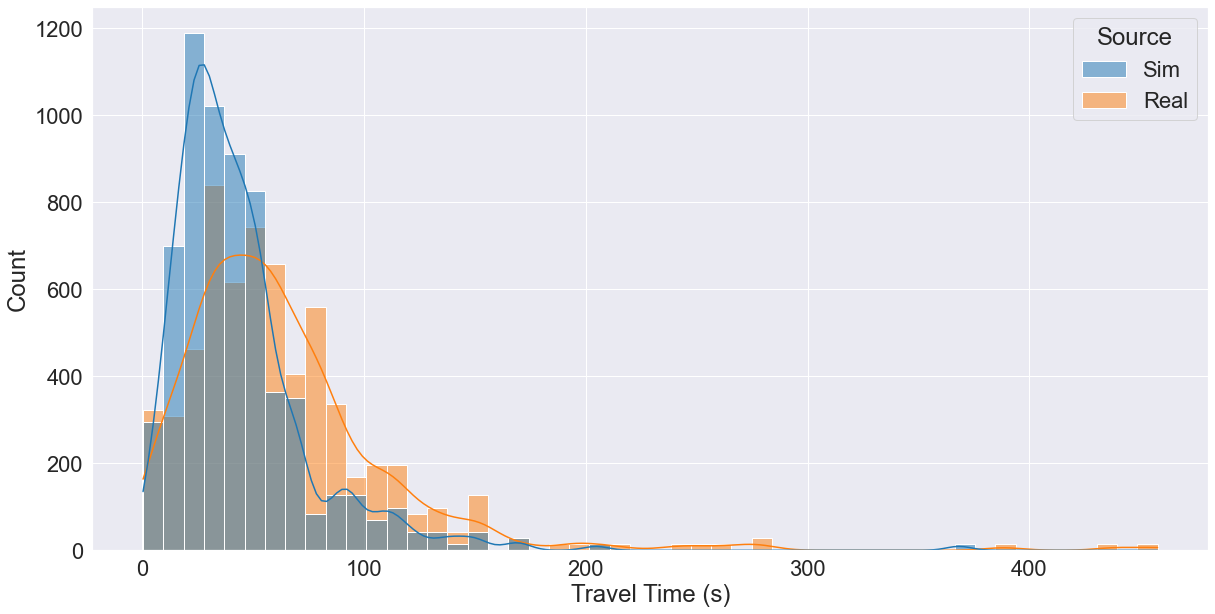

In [6]:
plt.figure(figsize=(20, 10))

sns.histplot(data=df, x='Time', hue='Source', kde=True, bins=50, palette='tab10')

plt.xlabel('Travel Time (s)')

median_sim_time = np.median(df[df['Source']=='Sim']['Time'].to_numpy())
median_real_time = np.median(df[df['Source']=='Real']['Time'].to_numpy())
print(f"Median sim time = {median_sim_time:.2f}, Median real time = {median_real_time:.2f}, percentage saving = {(median_real_time - median_sim_time) / median_real_time * 100:.2f} %")

Median sim energy = 13.82, Median real energy = 19.87, percentage saving = 30.46 %


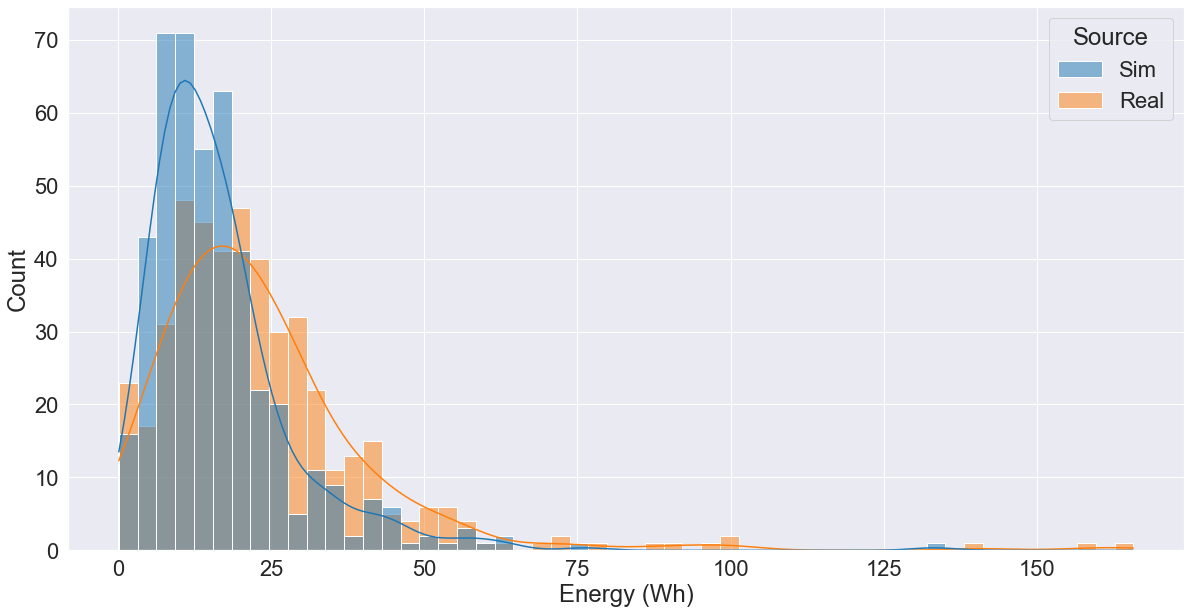

In [7]:
plt.figure(figsize=(20, 10))

sns.histplot(data=df[df['AuxP'] == 1300], x='Energy', hue='Source', kde=True, palette='tab10')

plt.xlabel('Energy (Wh)')

median_sim_energy = np.median(df[(df['Source']=='Sim') & (df['AuxP'] == 1300)]['Energy'].to_numpy())
median_real_energy = np.median(df[(df['Source']=='Real') & (df['AuxP'] == 1300)]['Energy'].to_numpy())
print(f"Median sim energy = {median_sim_energy:.2f}, Median real energy = {median_real_energy:.2f}, percentage saving = {(median_real_energy - median_sim_energy) / median_real_energy * 100:.2f} %")

Text(0, 0.5, 'Energy (Wh)')

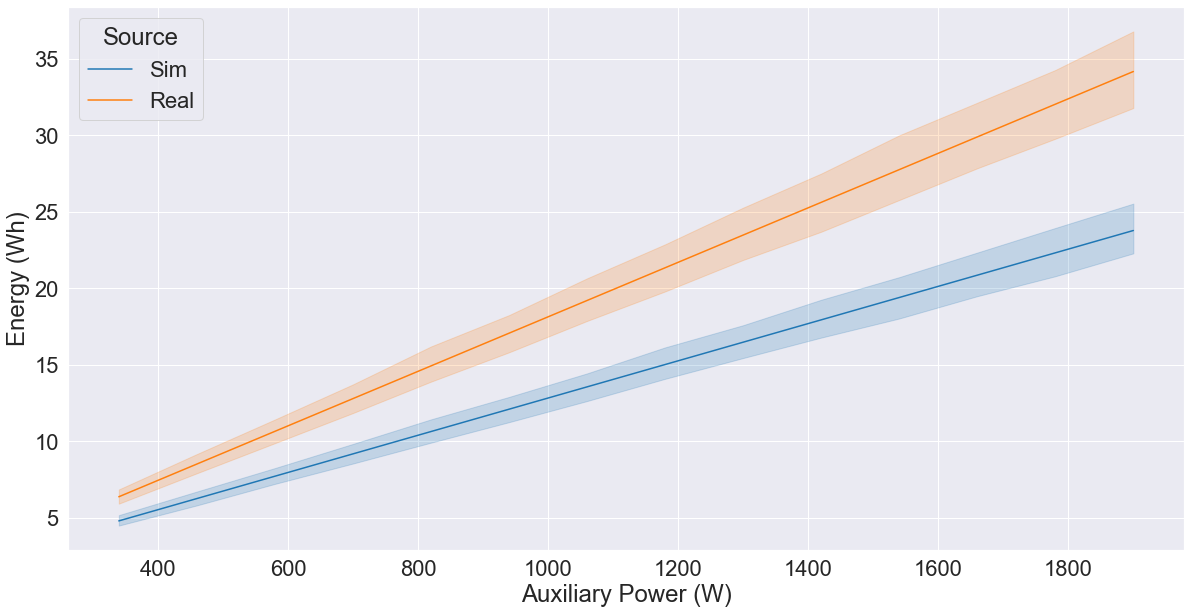

In [8]:
plt.figure(figsize=(20, 10))

sns.lineplot(data=df, x='AuxP', y='Energy', hue='Source', palette='tab10')

plt.xlabel('Auxiliary Power (W)')
plt.ylabel('Energy (Wh)')

Text(0, 0.5, 'Energy (Wh)')

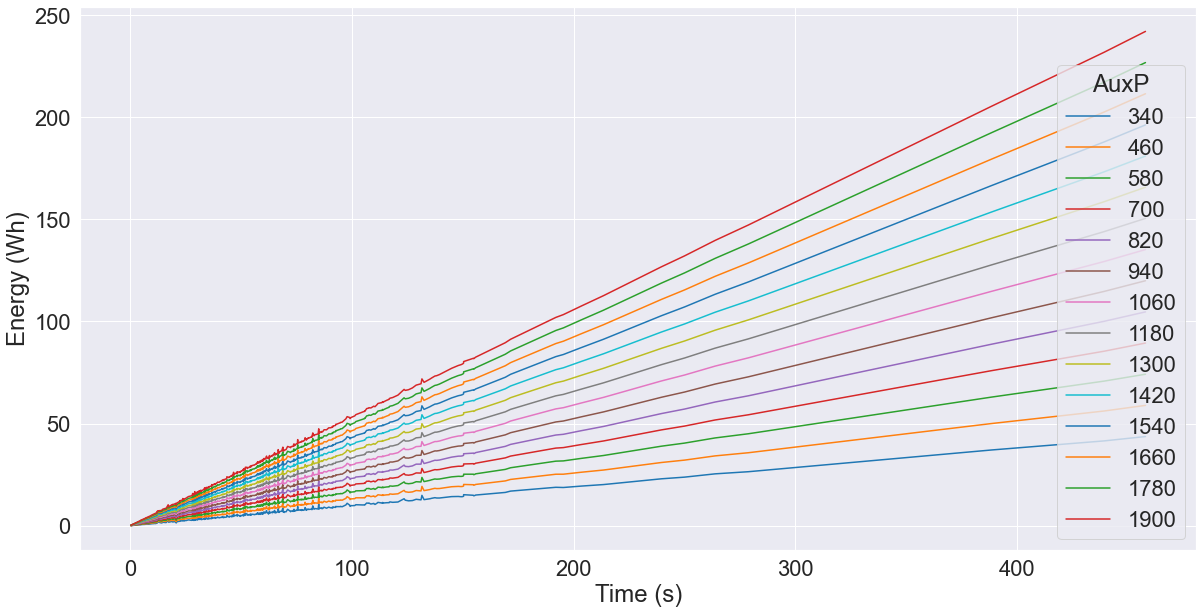

In [9]:
plt.figure(figsize=(20, 10))

# sns.lineplot(data=df, x='Time', y='Energy', hue='AuxP', style='Source', palette='tab10')
sns.lineplot(data=df[df['Source']=='Real'], x='Time', y='Energy', hue='AuxP', palette='tab10')
# sns.lmplot(data=df[df['Source']=='Real'], x='Time', y='Energy', hue='AuxP', palette='tab10', scatter=False, ci=95, height=10)

plt.xlabel('Time (s)')
plt.ylabel('Energy (Wh)')

Text(0, 0.5, 'Energy (Wh)')

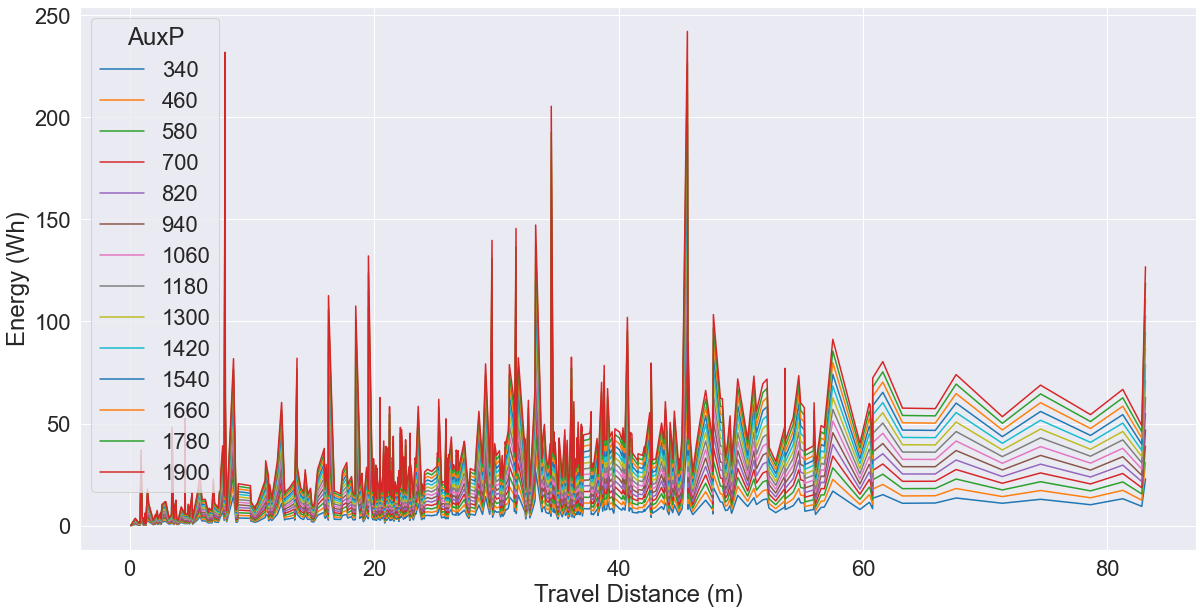

In [10]:
plt.figure(figsize=(20, 10))

# sns.lineplot(data=df, x='Distance', y='Energy', hue='AuxP', style='Source', palette='tab10')
sns.lineplot(data=df[df['Source']=='Real'], x='Distance', y='Energy', hue='AuxP', palette='tab10')

plt.xlabel('Travel Distance (m)')
plt.ylabel('Energy (Wh)')

In [11]:
slope_sim, intercept_sim, _, _, _ = linregress(x = df[df['Source']=='Sim']['AuxP'].to_numpy(), y = df[df['Source']=='Sim']['Energy'].to_numpy())
slope_real, intercept_real, _, _, _ = linregress(x = df[df['Source']=='Real']['AuxP'].to_numpy(), y = df[df['Source']=='Real']['Energy'].to_numpy())

f_sim = lambda x: slope_sim * x + intercept_sim
f_real = lambda x: slope_real * x + intercept_real

In [12]:
base_power = 300
l4_power = 340
ac_power_low = 480
ac_power_high = 1360

In [13]:
median_power_l4_cool_weather = f_sim(base_power + l4_power + ac_power_low/2)
median_power_real_cool_weather = f_real(base_power + ac_power_low)
print("median_power_l4_cool_weather:", median_power_l4_cool_weather)
print("median_power_real_cool_weather:", median_power_real_cool_weather)
print("Percentage saving:", (median_power_real_cool_weather - median_power_l4_cool_weather) / median_power_real_cool_weather * 100)

median_power_l4_hot_weather = f_sim(base_power + l4_power + ac_power_high/2)
median_power_real_hot_weather = f_real(base_power + ac_power_high)
print("median_power_l4_hot_weather:", median_power_l4_hot_weather)
print("median_power_real_hot_weather:", median_power_real_hot_weather)
print("Percentage saving:", (median_power_real_hot_weather - median_power_l4_hot_weather) / median_power_real_hot_weather * 100)

median_power_l4_cool_weather: 11.370608253303386
median_power_real_cool_weather: 14.217812014115106
Percentage saving: 20.02561124021814
median_power_l4_hot_weather: 16.724529194252447
median_power_real_hot_weather: 29.89852469155026
Percentage saving: 44.062359709076105
